Author: Rica Kesuma


Rakamin Academy

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

# Load Dataset

In [ ]:
df = pd.read_csv("loan_customer.csv")
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [ ]:
df.shape

(621, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Pengamatan:

1. Data berjumlah 621 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)
3. Tipe kolom birth_date memiliki tipe yang salah, sedangkan kolom lainnya sepertinya tidak ada issue yang mencolok pada tipe data (sudah sesuai)

# Data Cleansing

## Handling missing values

In [ ]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [ ]:
df['birth_date']= pd.to_datetime(df['birth_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        569 non-null    float64       
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

## Jika ada kolom dengan data kosong yang sangat banyak, maka kolom tersebut bisa dihapus aja

In [ ]:
df.drop('has_credit_card', axis=1, inplace=True)

In [ ]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,house,APPROVE


In [ ]:
df.shape

(621, 16)

In [ ]:
df.dropna(inplace=True)
df.shape

(434, 16)

In [ ]:
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

In [ ]:
df.duplicated().sum()

5

In [ ]:
print('Duplicated Data')
print(df.duplicated().sum())
print('Removed Duplicated Data')
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

Duplicated Data
5
Removed Duplicated Data
0


<Axes: xlabel='applicant_income'>

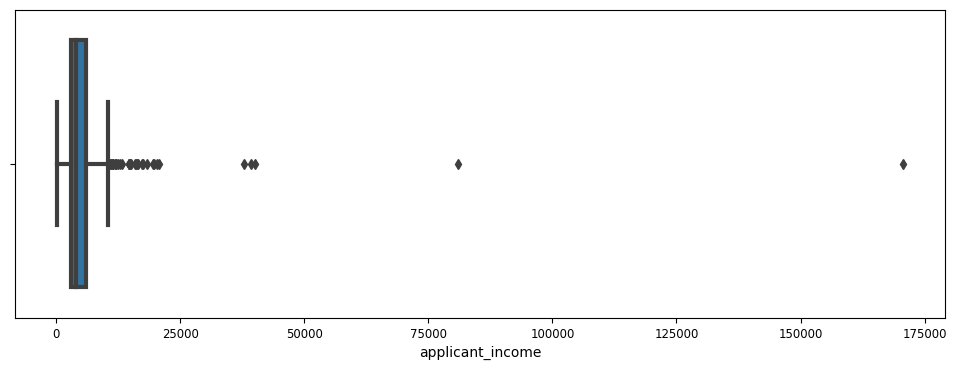

In [ ]:
sns.boxplot(x='applicant_income', data=df)

In [ ]:
print('Number of rows before filtering outliers:', len(df))

Q1 = df['applicant_income'].quantile(0.25)
Q3 = df['applicant_income'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["applicant_income"] >= low_limit) &
        (df["applicant_income"] <= high_limit)
        ]

print(f'Number of rows after filtering outliers: {len(df)}')

Number of rows before filtering outliers: 429
Number of rows after filtering outliers: 397


###Applicant_income

<Axes: xlabel='applicant_income'>

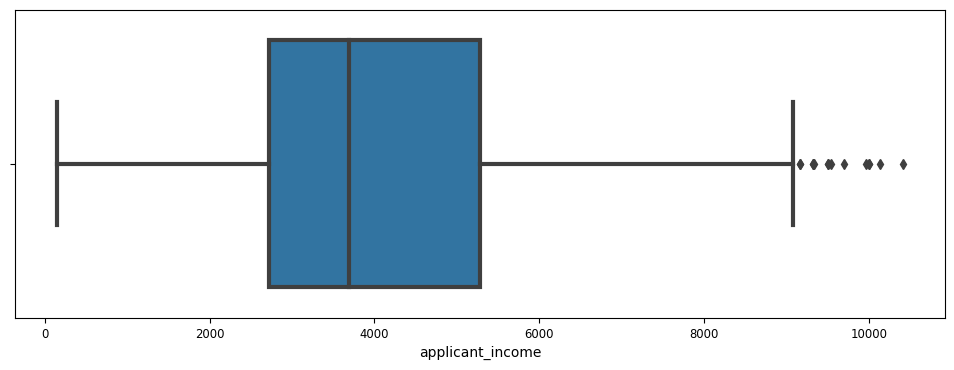

In [ ]:
sns.boxplot(x='applicant_income', data=df)

###Coapplicant_income

<Axes: xlabel='coapplicant_income'>

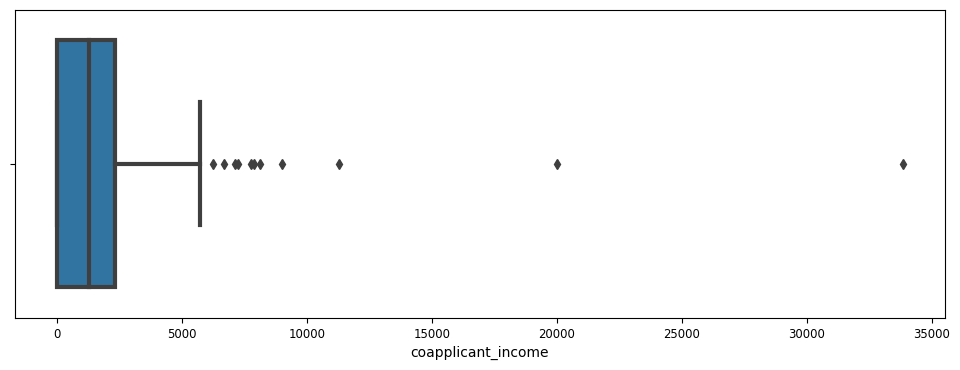

In [ ]:
sns.boxplot(x='coapplicant_income', data=df)

In [ ]:
print('Number of rows before filtering outliers:', len(df))

Q1 = df['coapplicant_income'].quantile(0.25)
Q3 = df['coapplicant_income'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["coapplicant_income"] >= low_limit) &
        (df["coapplicant_income"] <= high_limit)
        ]

print(f'Number of rows after filtering outliers: {len(df)}')

Number of rows before filtering outliers: 397
Number of rows after filtering outliers: 386


<Axes: xlabel='applicant_income'>

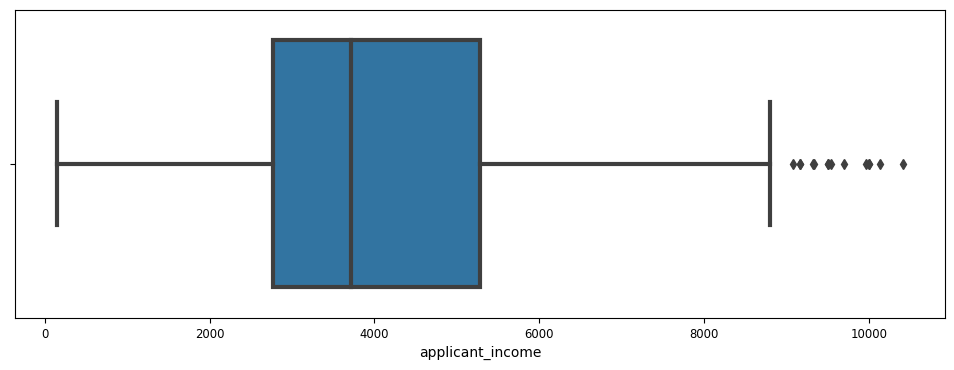

In [ ]:
sns.boxplot(x='applicant_income', data=df)

<Axes: xlabel='loan_amount'>

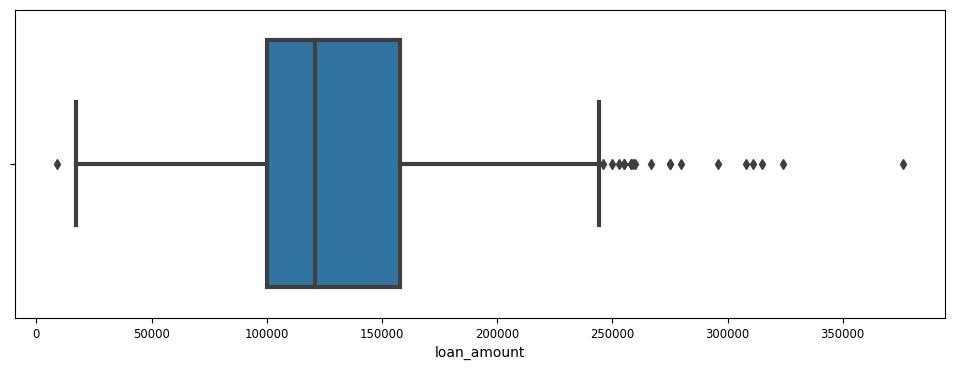

In [ ]:
sns.boxplot(x='loan_amount', data=df)

In [ ]:
print('Number of rows before filtering outliers:', len(df))

Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["loan_amount"] >= low_limit) &
        (df["loan_amount"] <= high_limit)
        ]

print(f'Number of rows after filtering outliers:: {len(df)}')

Number of rows before filtering outliers: 386
Number of rows after filtering outliers:: 366


<Axes: xlabel='loan_amount'>

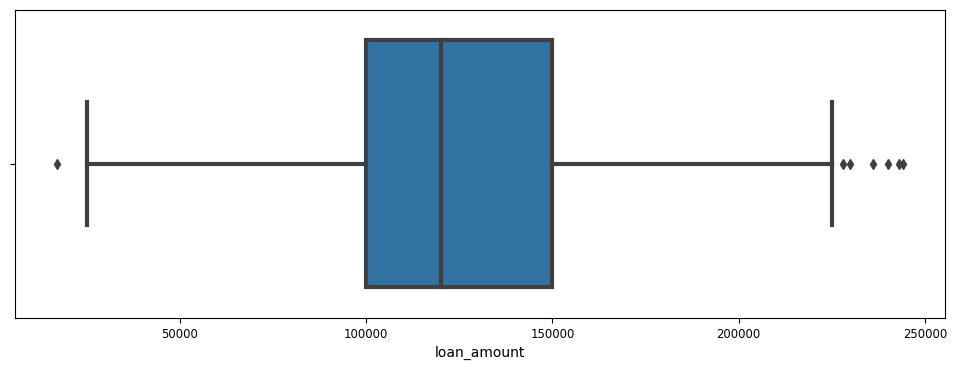

In [ ]:
sns.boxplot(x='loan_amount', data=df)

In [ ]:
df.shape

(366, 16)

In [ ]:
df1 = df.copy()

cats = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']

for i in cats:
    print('Kolom', i, df1[i].unique())

Kolom gender ['Male' 'Female']
Kolom married ['No' 'Yes']
Kolom dependents ['0' '1' '3+' '2']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['No' 'Yes']
Kolom property_type ['house' 'studio' 'apartment']


In [ ]:
mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3+' : 3
}

mapping_education = {
    'Not Graduate' : 0,
    'Graduate' : 1
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

mapping_property_type = {
    'house' : 0,
    'studio' : 1, 
    'apartment' : 2
}

df1['gender'] = df1['gender'].map(mapping_gender)
df1['married'] = df1['married'].map(mapping_married)
df1['dependents'] = df1['dependents'].map(mapping_dependents)
df1['education'] = df1['education'].map(mapping_education)
df1['self_employed'] = df1['self_employed'].map(mapping_self_employed)
df1['property_type'] = df1['property_type'].map(mapping_property_type)

In [ ]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,LP002964,1984-02-27,6.281191e+11,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157000,360,30,1.0,studio,APPROVE
615,LP002974,1988-03-24,6.285739e+11,Male,Yes,0,Graduate,No,3232.0,1950.0,108000,360,30,1.0,studio,APPROVE
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,studio,APPROVE


In [ ]:
df_gr1 = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df_gr1.columns = ['gender', 'property_type', 'count']
df_gr1

,gender,property_type,count
0,Female,apartment,34
1,Female,house,16
2,Female,studio,17
3,Male,apartment,114
4,Male,house,98
5,Male,studio,87


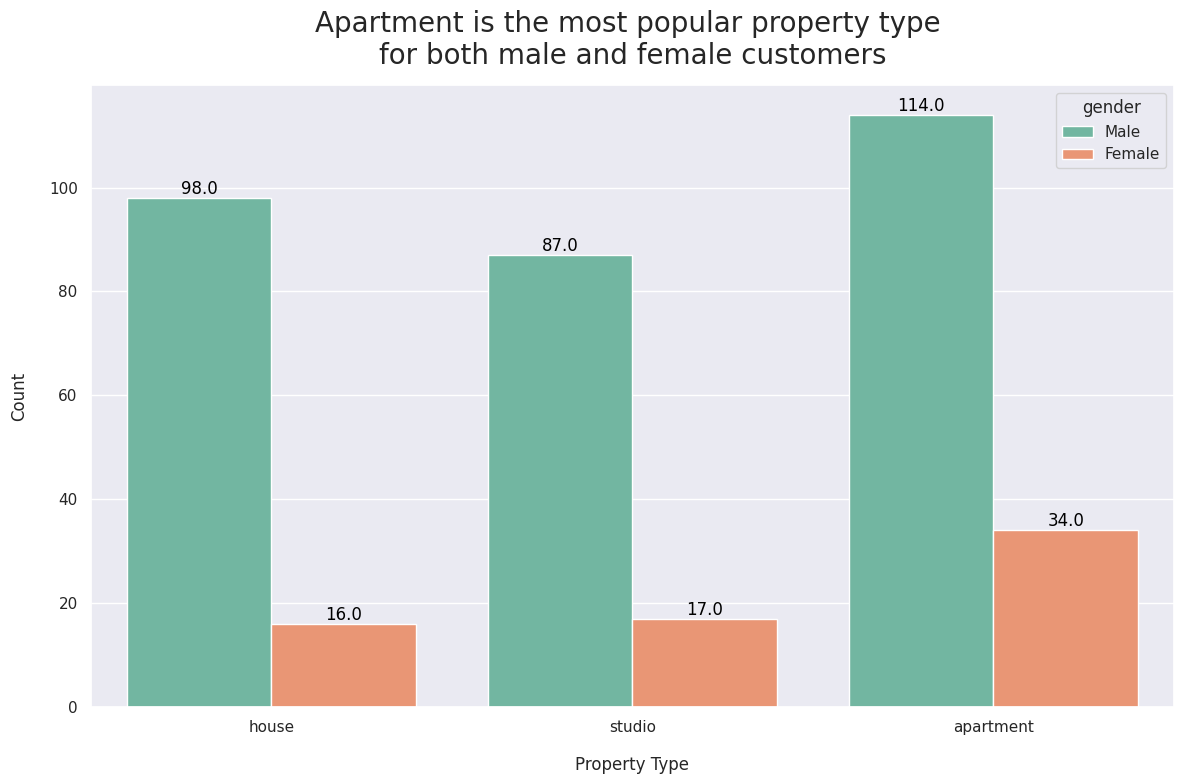

In [ ]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(12,8))
sns.countplot(x = 'property_type', data = df, hue = 'gender', palette = "Set2")

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)
    
ax.set_xlabel('Property Type', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Apartment is the most popular property type \nfor both male and female customers', pad=15, size=20)
plt.tight_layout() 
plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200);

In [ ]:
df_gr2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_gr2.columns = ['married', 'loan_term_year', 'number_of_applicant']
df_gr2

,married,loan_term_year,number_of_applicant
0,No,3,2
1,No,5,1
2,No,10,1
3,No,15,4
4,No,25,3
5,No,30,119
6,No,40,6
7,Yes,5,1
8,Yes,7,3
9,Yes,10,1


<Axes: xlabel='loan_term_year', ylabel='Count'>

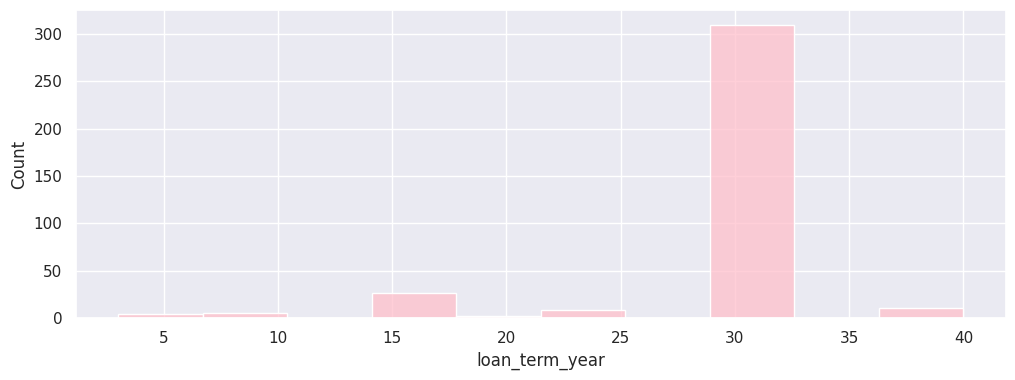

In [ ]:
sns.histplot(data=df, x="loan_term_year", bins=10, color="pink")

In [ ]:
loan_term_year_group = {}
for i in range(1,41):
    if i<15:
        loan_term_year_group[i]= '<15'
    elif i>=15 and i<=25:
        loan_term_year_group[i]= '15-25'
    elif i==30:
        loan_term_year_group[i]= '30'
    elif i>30:
        loan_term_year_group[i]= '>30'
    else:
        pass
    
# membuat kolom baru berdasarkan pada grouping sebelumnya
df_gr2['loan_term_year_group'] = df_gr2['loan_term_year'].replace(loan_term_year_group)

Text(-0.5, 205, 'Most applicants who are married or not have chosen a loan term of 30 years')

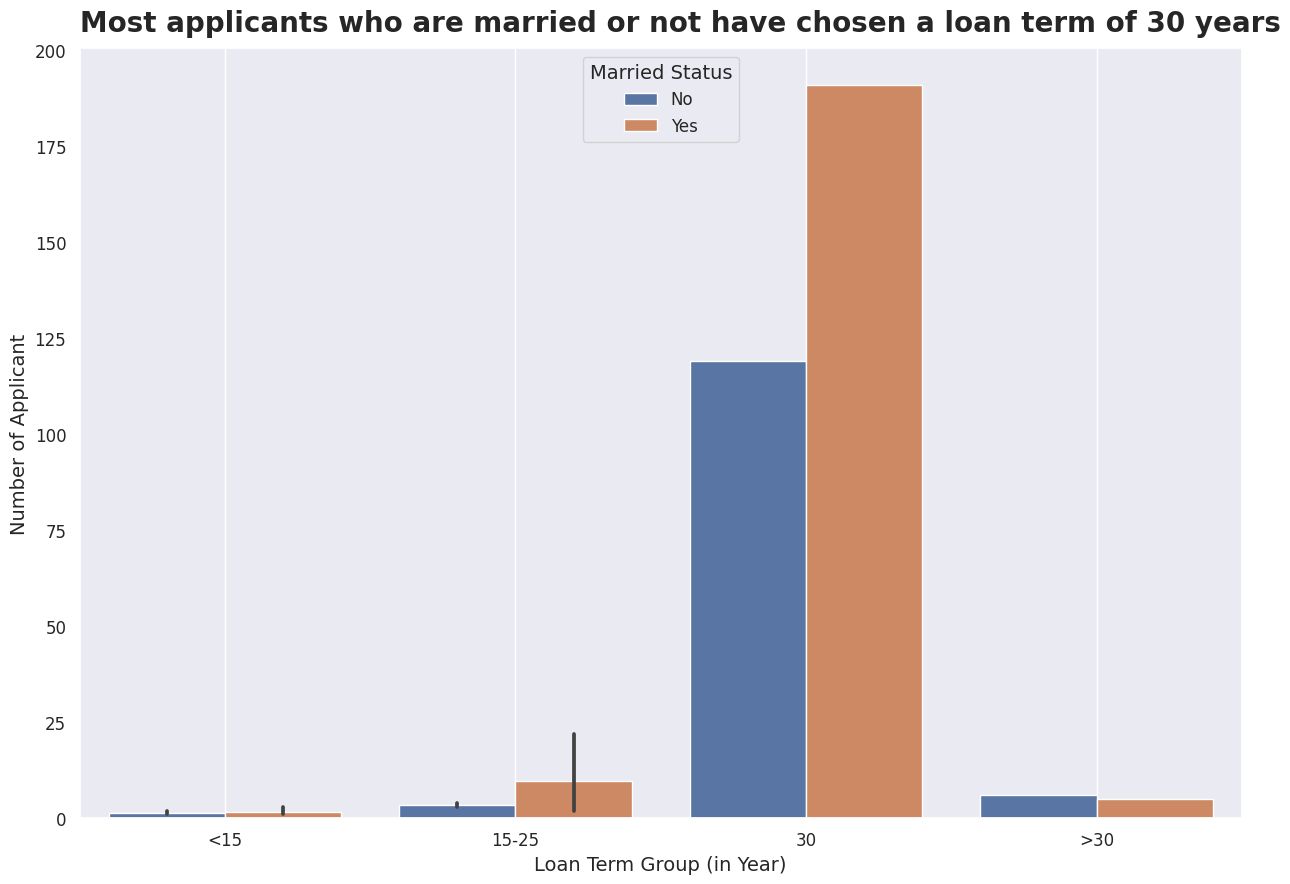

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_term_year_group', y='number_of_applicant', hue='married', data=df_gr2)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.legend(title='Married Status', title_fontsize=14, prop={'size':12}, loc=9)

plt.xlabel('Loan Term Group (in Year)', fontsize=14)
plt.ylabel('Number of Applicant', fontsize=14)
plt.text(x=-0.5, y=205, s="Most applicants who are married or not have chosen a loan term of 30 years", 
         fontsize=20, fontweight='bold') 

# Conclusion

Berdasarkan pada pengamatan yang dilakukan, dapat disimpulkan bahwa perilaku pelanggan mayoritas berjenis kelamin laki-laki usia rata-rata >30 tahun dengan status sudah menikah serta mayoritas dari mereka memilih jangka waktu kredit selama 30 tahun, hal ini terjadi kemungkinan karena orang yang sudah berkeluarga membutuhkan kredit karena untuk kehidupan sehari-hari seperti tempat tinggal dibandingkan orang yang belum menikah.